<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

C:\Users\julia\Documents\Imperial\DA_project


In [144]:
import pickle
from notebooks import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
from notebooks import utils
sns.set_style("whitegrid")
from collections import OrderedDict
import numpy as np

In [140]:
exp_dir = "experiments/retrain/"
outfp = "report/figures/fine_tuning.png"

In [24]:
#results = utils.extract_res_from_files(exp_dir)
TRAIN1 = [("L1", 50)]
TRAIN2 = [("L2", 150), ("L1", 50)]
#names 
models = OrderedDict([
("tucodec_relu_vanilla", {"loc": 'experiments/06a5/12', "sched": TRAIN1}),
("tucodec_prelu_next", {"loc": 'experiments/DA3/06a/1/', "sched": TRAIN1}),
("RDB3_27_4",  {"loc": 'experiments/09a/09a/0', "sched": TRAIN2}),
("ResNeXt_27_1", {"loc": 'experiments/09a/09a/2', "sched": TRAIN2}),
("RAB_4_next",   {"loc": 'experiments/03c/10/', "sched": TRAIN2}),
("GDRN_CBAM",  {"loc": 'experiments/09c/0', "sched": TRAIN2})])

In [158]:
keys= ["mse_DA", "time", "l1_loss", "l2_loss"]
epochs1 = list(range(150, 360, 10)) + [299, 349]
#print(epochs1)
results= utils.extract_res_from_files2(exp_dir, epochs1, keys)

6 experiments conducted


In [159]:
name_dict = {'tucodec_relu_vanilla': "Tucodec-vanilla",
             'tucodec_prelu_next': "Tucodec-NeXt",
             'RDB3_27_4': "RDB3-27-4-vanilla+CBAM",
             'ResNeXt_27_1': "ResNeXt3-27-1-vanilla+CBAM",
             'RAB_4_next': "RAB-4-NeXt",
             'GDRN_CBAM': "GRDN-NeXt+CBAM"
            }


dfs  = []
ignore = ["tucodec_relu_vanilla", "tucodec_prelu_next", "RDB3_27_4"] #"RAB_4_next"]
for result in results:
    #model_data = result["model_data"]
    model_name = result["path"].split("/")[-1]
    if model_name in ignore:
        continue
    label = name_dict[model_name]
    df = result["df"].copy()
    df["Model"] = label
    dfs.append(df)
    print(df.shape)
DF = pd.concat(dfs, ignore_index=True)


LARGE = 0.3
REPLACE = 0.25
#update large values with manageably large values
DF["mse_DA"] = DF["mse_DA"].apply(lambda x: x if x < LARGE else REPLACE)

DF["Epoch"] = DF["epoch"]
DF["MSE DA"] = DF["mse_DA"]
print(DF.mse_DA.mean())
DF[DF ["mse_DA"] >= LARGE]

(44, 7)
(44, 7)
(44, 7)
0.15602645020476663


,epoch,l1_loss,l2_loss,mse_DA,time,Subset,Model,Epoch,MSE DA


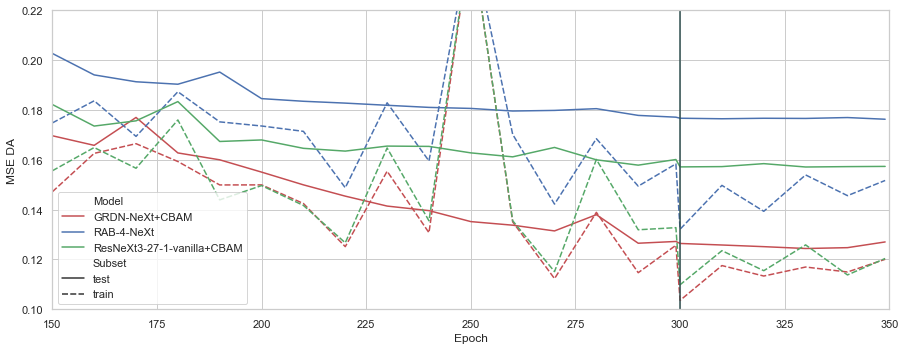

In [161]:
ALPHA_TRAIN = 0.25
ALPHA_TEST = 0.25

ax = sns.lineplot(x="Epoch", y="MSE DA",
             hue="Model", style="Subset", 
             data=DF, palette=["r", "b", 'g', ]) #"y", ])

ax.set_ylim(( 0.1, 0.22))
ax.set_xlim((150, 350))


#add dotted lines for tucodec values
y = np.linspace(0.0,1,10)
x = 0 * y + 300
ax.plot(x, y, '-', color="darkslategrey")

    
    
fig = plt.gcf()
fig.set_size_inches(15, 5.5)
fig.savefig(outfp)


ax = sns.lineplot(x="Epoch", y="l2_loss",
             hue="Model", style="Subset", 
             data=DF, palette=["r", "b", 'g', ]), #"y", ])

ax.set_ylim(( 800, 4000))
fig = plt.gcf()
fig.set_size_inches(15, 7)

['tucodec_relu_vanilla', 'tucodec_prelu_next', 'RDB3_27_4', 'ResNeXt_27_1', 'RAB_4_next', 'GDRN_CBAM']


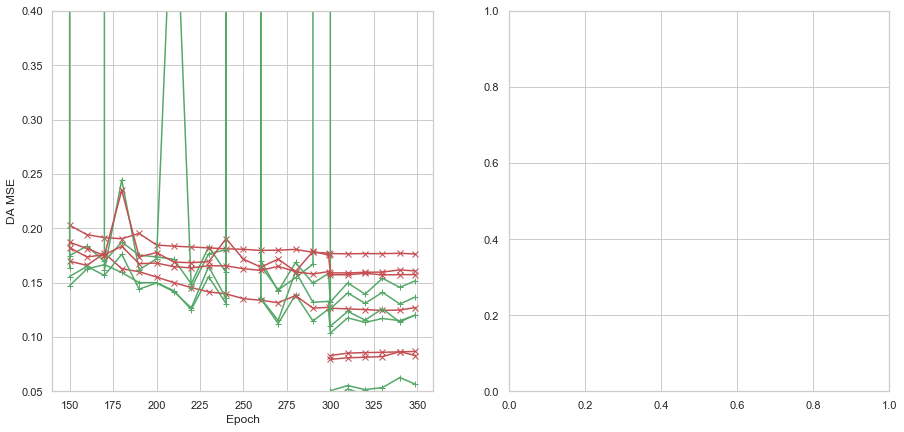

In [54]:
fig, axs = plt.subplots(1, 2,  sharey=False)

metrics = ["mse_DA", "l2_loss"]
colors = ["r", "b", 'g', "y", ]
ylim1 = (0.05, 0.4)

names = list(models.keys()) #ignore tucodec 
print(names)

for result in results:
    test_df = result["test_df"]
    train_df = result["train_df"]
    
    settings = result["settings"]
    
    
    axs[0] 
    axs[0].set_ylabel('DA MSE', ) 
    axs[0].set_xlabel('Epoch', )  

    axs[0].plot(train_df.epoch, 'mse_DA', data=train_df, marker='+', color="g", )
    axs[0].plot(train_df.epoch, 'mse_DA', data=test_df, marker='x', color="r")
    axs[0].tick_params(axis='y',)
    axs[0].set_ylim(ylim1)
    
    fig.set_size_inches(15, 7)
    
#     ax = plt.plot(test_df.epoch, test_df[metric], 'ro-')
#     plt.plot(train_df.epoch, train_df[metric], 'g+-')
#     plt.grid(True, axis='y', )
#     ax[0].grid(True, axis='x', )
#     

In [ ]:
caption

Note that unlike in \ref{fig:augmentation} which gives the L2 Reconstruction error, 